# Residual Demand Model

In [1]:
import sys
sys.path.append('../..')

import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from rivapy.models import OrnsteinUhlenbeck
from rivapy.sample_data import residual_demand_models
from rivapy.tools.datetime_grid import DateTimeGrid

%load_ext autoreload
%autoreload 2
%matplotlib inline

c:\Users\Anwender\RiVaPy\notebooks\models\../..\rivapy\__init__.py:11: UserWarning: The pyvacon module is not available. You may not use all functionality without this module. Consider installing pyvacon.
  warnings.warn('The pyvacon module is not available. You may not use all functionality without this module. Consider installing pyvacon.')


## Ornstein Uhlenbeck

The Ornstein-Uhlenbeck model is the main ingredient in the following example models for solar, wind and load. The stochastic process is given by

$$ dX_t = \lambda(\mu-X)dt++\sigma dW_t. $$

Here

- $\lambda$ is the speed of mean reversion and determines how fast the process drifts to the mean reversion level $\mu$,
- $\mu$ denotes the mean reversion level,
- $\sigma$ is the volatiity of the process.

The model implemented in the rivapy assumes a zero mean reversion level. 
To give an impression on the influence of $\lambda$ and $\mu$ we plot simulated paths for different parameters.

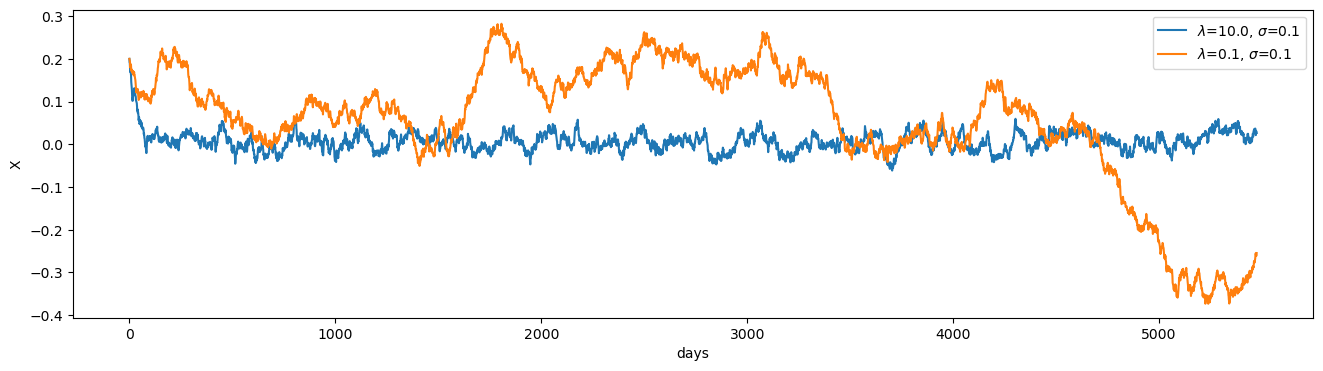

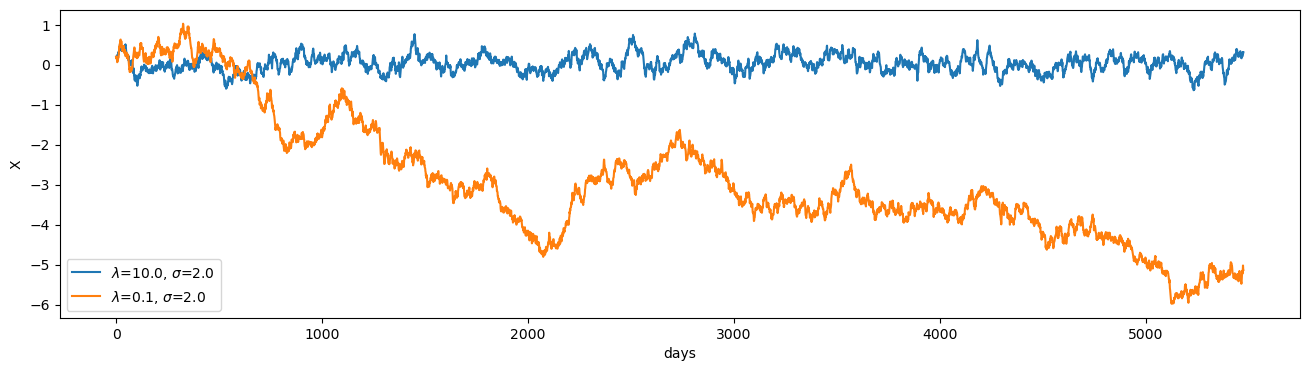

In [5]:
timegrid = np.arange(0.0,15.0,1.0/365.0) # simulate on daily timegrid over 5yrs horizon

plt.figure(figsize=(16,4))
ou_model = OrnsteinUhlenbeck(speed_of_mean_reversion = 10.0, volatility=0.1)
sim = ou_model.simulate(timegrid, start_value=0.2,rnd=np.random.normal(size=(timegrid.shape[0], 1)))
plt.plot(sim[:,0], label='$\lambda$=10.0, $\sigma$=0.1')
ou_model = OrnsteinUhlenbeck(speed_of_mean_reversion = 0.1, volatility=0.1)
sim = ou_model.simulate(timegrid, start_value=0.2,rnd=np.random.normal(size=(timegrid.shape[0], 1)))
plt.plot(sim[:,0], label='$\lambda$=0.1, $\sigma$=0.1')
plt.legend()
plt.xlabel('days')
plt.ylabel('X')
plt.figure(figsize=(16,4))
ou_model = OrnsteinUhlenbeck(speed_of_mean_reversion = 10.0, volatility=1.0)
sim = ou_model.simulate(timegrid, start_value=0.2,rnd=np.random.normal(size=(timegrid.shape[0], 1)))
plt.plot(sim[:,0], label='$\lambda$=10.0, $\sigma$=2.0')
ou_model = OrnsteinUhlenbeck(speed_of_mean_reversion = 0.1, volatility=1.0)
sim = ou_model.simulate(timegrid, start_value=0.2,rnd=np.random.normal(size=(timegrid.shape[0], 1)))
plt.plot(sim[:,0], label='$\lambda$=0.1, $\sigma$=2.0')
plt.xlabel('days')
plt.ylabel('X')
plt.legend();

### Calibration

The model may be calibrated to data. Here, the data must be given on a uniform grid. The calibration can either be done by maximum likelihood or by minimum least square.

In [ ]:
sim.shape
timegrid = np.arange(0.0,10.0,1.0/365.0) # simulate on daily timegrid over 5yrs horizon

iters = 100
mean_reversion_speed, volatility, mean_level = np.empty((iters,)), np.empty((iters,)), np.empty((iters,))

for i in range (iters):
    ou_model = OrnsteinUhlenbeck(speed_of_mean_reversion = 5.0, volatility=0.1)
    sim = ou_model.simulate(timegrid, start_value=0.2,rnd=np.random.normal(size=(1, timegrid.shape[0])))
    ou_model.calibrate(sim.reshape((-1)),dt=1.0/365.0, method = 'minimum_least_square')
    mean_reversion_speed[i] = ou_model.speed_of_mean_reversion
    volatility[i] = ou_model.volatility
    mean_level[i] = ou_model.mean_reversion_level
    
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
plt.hist(mean_reversion_speed, bins=10)
plt.title('speed of meanreversion')
plt.xlabel('speed of meanreversion')
plt.subplot(1,3,2)
plt.hist(volatility, bins=10)
plt.title('volatility')
plt.xlabel('volatility')
plt.subplot(1,3,3)
plt.hist(mean_level, bins=10)
plt.title('mean reversion level')
plt.xlabel('mean reversion level');

## Wind

## RDM

In [ ]:
residual_demand_model = residual_demand_models.WagnerModel.residual_demand_model()

In [ ]:
dg = DateTimeGrid(start=dt.datetime(2022, 1, 1), end=dt.datetime(2022,2,1), freq='1H')
n_sims = 5000

In [ ]:
result = residual_demand_model.simulate(dg, 
                                start_value_wind = 0.5,
                                start_value_solar = 0.5,
                                start_value_load = 0.0,
                                n_sims = n_sims)

In [ ]:
residual = result['load'] - result['solar'] - result['wind']

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('offpeak')
residual_demand_model.supply_curve.plot(dt.datetime(2022, 1, 1), 20, 80)
plt.subplot(1,2,2)
plt.title('peak')
residual_demand_model.supply_curve.plot(dt.datetime(2022, 1, 1, 12,0), 20, 80)

## Erwartungswert load, residual demand and price

In [ ]:
plt.figure(figsize=(16,6))


plt.subplot(1,2,1)
plt.plot(result['solar'].mean(axis=1),'-', label='solar')
plt.plot(result['wind'].mean(axis=1),'-', label='wind')
plt.plot(result['solar'].mean(axis=1) + result['wind'].mean(axis=1),'-', label='solar+wind')
plt.legend()
plt.title('renewables')

plt.subplot(1,2,2)
for i in range(20):
    plt.plot(result['load'][:,i], '.r', alpha=0.1)
plt.plot(result['load'].mean(axis=1),'-b')
plt.title('load')


plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(residual.mean(axis=1))
plt.title('residual demand')
plt.subplot(1,2,2)
#for i in range(20):
#    plt.plot(result['price'][:,i], '.r', alpha=0.1)
plt.plot(result['price'].mean(axis=1),'-b')
plt.title('price');

In [ ]:
dt.datetime(2020,2,29)-dt.datetime(2020,2,29)